In [17]:
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
from tool._fixedInt import *    ##Libreria para el uso de punto fijo

##  ipython nbconvert --to latex --post PDF <Name.ipynb>

## Parametros generales
# T     = 1.0/21.0e9  # Periodo de baudio
# Nsymb = 1000        # Numero de simbolos
# os    = 4
# ## Parametros de la respuesta en frecuencia
# Nfreqs = 256          # Cantidad de frecuencias

# ## Parametros del filtro de caida cosenoidal
# beta   = [0.0,0.5,1.0] # Roll-Off
# Nbauds = 8.0          # Cantidad de baudios del filtro
# ## Parametros funcionales
# Ts = T/os              # Frecuencia de muestreo

#////////////////////////////////////
## Parametros generales
T     = 1.0/21.0e9  # Periodo de baudio
Nsymb = 1000        # Numero de simbolos
os    = 8
## Parametros de la respuesta en frecuencia
Nfreqs = 256          # Cantidad de frecuencias

## Parametros del filtro de caida cosenoidal
beta   = [0.0,0.5,1.0] # Roll-Off
Nbauds = 16.0          # Cantidad de baudios del filtro
## Parametros funcionales
Ts = T/os              # Frecuencia de muestreo



In [18]:
def rcosine(beta, Tbaud, oversampling, Nbauds, Norm):
    """ Respuesta al impulso del pulso de caida cosenoidal """
    t_vect = np.arange(-0.5*Nbauds*Tbaud, 0.5*Nbauds*Tbaud, 
                       float(Tbaud)/oversampling)

    y_vect = []
    for t in t_vect:
        y_vect.append(np.sinc(t/Tbaud)*(np.cos(np.pi*beta*t/Tbaud)/ (1-(4.0*beta*beta*t*t/ (Tbaud*Tbaud)))))

    y_vect = np.array(y_vect)

    if(Norm):
        return (t_vect, y_vect/np.sqrt(np.sum(y_vect**2)))
        #return (t_vect, y_vect/y_vect.sum())
    else:
        return (t_vect,y_vect)

In [19]:
#Dependiendo de la opcion devolvemos una de las 6 cuantificacion pedidas por le punto 4 del TP5
def cuantizacion (rc0,rc1,rc2):
    rc0_0 = []
    rc1_1 = []    
    rc2_2 = []
    opc   = 1

    if (opc == 1 ):
    #1er Cauntificacion
        print("opc1")
        aux_1 = arrayFixedInt(8, 7, rc0, signedMode='S', roundMode='trunc', saturateMode='saturate') #S (8,7) Trunc con saturacion
        aux_2 = arrayFixedInt(8, 7, rc1, signedMode='S', roundMode='trunc', saturateMode='saturate') #S (8,7) trunc con saturacion
        aux_3 = arrayFixedInt(8, 7, rc2, signedMode='S', roundMode='trunc', saturateMode='saturate') #S (8,7) trunc con saturacion
    elif (opc == 2):
    #2da cuantificacion
        print("opc2")
        aux_1 = arrayFixedInt(8, 7, rc0, signedMode='S', roundMode='round', saturateMode='saturate') #S (8,7) round con saturacion
        aux_2 = arrayFixedInt(8, 7, rc1, signedMode='S', roundMode='round', saturateMode='saturate') #S (8,7) round con saturacion
        aux_3 = arrayFixedInt(8, 7, rc2, signedMode='S', roundMode='round', saturateMode='saturate') #S (8,7) round con saturacion
    elif (opc == 3):
    #3ra cuantificacion   
        print("opc3")
        aux_1 = arrayFixedInt(3, 2, rc0, signedMode='S', roundMode='trunc', saturateMode='saturate') #S (3,2) trunc con saturacion
        aux_2 = arrayFixedInt(3, 2, rc1, signedMode='S', roundMode='trunc', saturateMode='saturate') #S (3,2) trunc con saturacion
        aux_3 = arrayFixedInt(3, 2, rc2, signedMode='S', roundMode='trunc', saturateMode='saturate') #S (3,2) trunc con saturacion

    elif (opc == 4 ):
    #4ta Cauntificacion
        print("opc4")
        aux_1 = arrayFixedInt(3, 2, rc0, signedMode='S', roundMode='round', saturateMode='saturate') #S (3,2) round con saturacion
        aux_2 = arrayFixedInt(3, 2, rc1, signedMode='S', roundMode='round', saturateMode='saturate') #S (3,2) round con saturacion
        aux_3 = arrayFixedInt(3, 2, rc2, signedMode='S', roundMode='round', saturateMode='saturate') #S (3,2) round con saturacion
    elif (opc == 5):
    #5ta cuantificacion
        print("opc5")
        aux_1 = arrayFixedInt(6, 4, rc0, signedMode='S', roundMode='trunc', saturateMode='saturate') #S (6,4) trunc con saturacion
        aux_2 = arrayFixedInt(6, 4, rc1, signedMode='S', roundMode='trunc', saturateMode='saturate') #S (6,4) trunc con saturacion
        aux_3 = arrayFixedInt(6, 4, rc2, signedMode='S', roundMode='trunc', saturateMode='saturate') #S (6,4) trunc con saturacion
    elif (opc == 6):
    #6ta cuantificacion   
        print("opc6")
        aux_1 = arrayFixedInt(6, 4, rc0, signedMode='S', roundMode='round', saturateMode='saturate') #S (6,4) round con saturacion
        aux_2 = arrayFixedInt(6, 4, rc1, signedMode='S', roundMode='round', saturateMode='saturate') #S (6,4) round con saturacion
        aux_3 = arrayFixedInt(6, 4, rc2, signedMode='S', roundMode='round', saturateMode='saturate') #S (6,4) round con saturacion

    #lleno las listas creadas con los valores cuantificados
    for ptr in range(len(rc0)):
        rc0_0.append(aux_1[ptr].fValue)
    for ptr in range(len(rc1)):
        rc1_1.append(aux_2[ptr].fValue)
    for ptr in range(len(rc2)):
        rc2_2.append(aux_3[ptr].fValue)

    #convierto las listas en arrays tipo numpy          
    rc0 = np.array(rc0_0)    
    rc1 = np.array(rc1_1)
    rc2 = np.array(rc2_2)

    #retorno los nuevos valores cuantificados
    return (rc0,rc1,rc2)    

In [4]:
#COMPARACION DE VALORES NO CUANTIFICADOS Y CUANTIFICADOS#

## Calculo de tres pusos con diferente roll-off
# (t,rc0) = rcosine(beta[0], T,os,Nbauds,Norm=False)
# (t,rc1) = rcosine(beta[1], T,os,Nbauds,Norm=False)
# (t,rc2) = rcosine(beta[2], T,os,Nbauds,Norm=False)

# #Cuantizacion de los roll-off
# (rc0_0,rc1_1,rc2_2) = cuantizacion(rc0,rc1,rc2)

# N = 20
# for ptr in range(N):
#     print (rc0[ptr],'\t\t\t',rc0_0[ptr])


opc1
7.84783935546875 6.93487548828125 5.904052734375


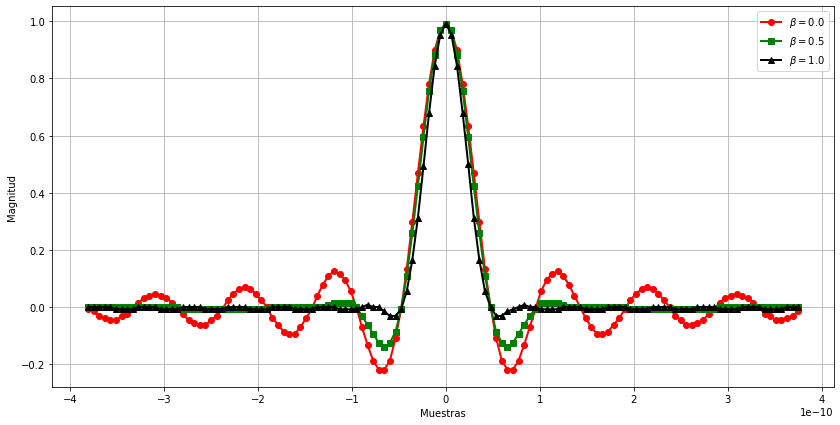

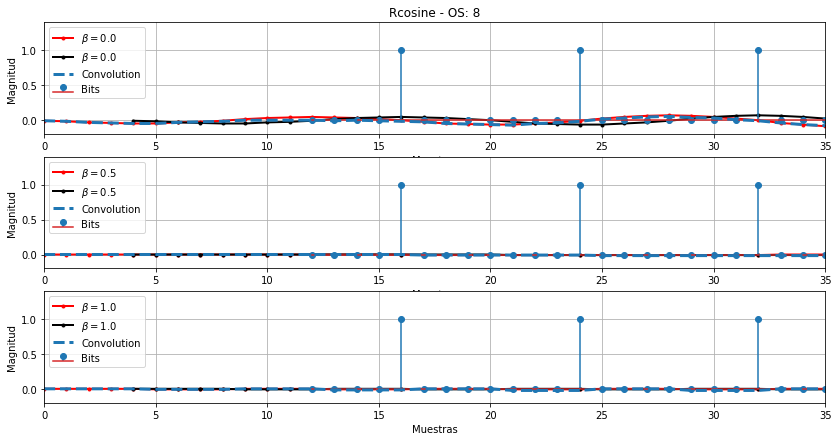

In [20]:
## Calculo de tres pusos con diferente roll-off
(t,rc0) = rcosine(beta[0], T,os,Nbauds,Norm=False)
(t,rc1) = rcosine(beta[1], T,os,Nbauds,Norm=False)
(t,rc2) = rcosine(beta[2], T,os,Nbauds,Norm=False)
#Cuantizacion de los roll-off
(rc0,rc1,rc2) = cuantizacion(rc0,rc1,rc2)

print (np.sum(rc0**2),np.sum(rc1**2),np.sum(rc2**2))
## Generacion de las graficas
plt.figure(figsize=[14,7])
plt.plot(t,rc0,'ro-',linewidth=2.0,label=r'$\beta=0.0$')
plt.plot(t,rc1,'gs-',linewidth=2.0,label=r'$\beta=0.5$')
plt.plot(t,rc2,'k^-',linewidth=2.0,label=r'$\beta=1.0$')
plt.legend()
plt.grid(True)
#plt.xlim(0,len(rc0)-1)
plt.xlabel('Muestras')
plt.ylabel('Magnitud')

symb00    = np.zeros(int(os)*3+1);symb00[4:len(symb00)-1:int(os)] = 1.0
rc0Symb00 = np.convolve(rc0,symb00)
rc1Symb00 = np.convolve(rc1,symb00)
rc2Symb00 = np.convolve(rc2,symb00)

plt.figure(figsize=[14,7])
plt.subplot(3,1,1)
plt.plot(np.arange(0,len(rc0)),rc0,'r.-',linewidth=2.0,label=r'$\beta=0.0$')
plt.plot(np.arange(4,len(rc0)+4),rc0,'k.-',linewidth=2.0,label=r'$\beta=0.0$')
plt.stem(np.arange(12,len(symb00)+12),symb00,label='Bits',use_line_collection=True)
plt.plot(rc0Symb00[4::],'--',linewidth=3.0,label='Convolution')
plt.legend()
plt.grid(True)
plt.xlim(0,35)
plt.ylim(-0.2,1.4)
plt.xlabel('Muestras')
plt.ylabel('Magnitud')
plt.title('Rcosine - OS: %d'%int(os))

#plt.figure()
plt.subplot(3,1,2)
plt.plot(np.arange(0,len(rc1)),rc1,'r.-',linewidth=2.0,label=r'$\beta=0.5$')
plt.plot(np.arange(4,len(rc1)+4),rc1,'k.-',linewidth=2.0,label=r'$\beta=0.5$')
plt.stem(np.arange(12,len(symb00)+12),symb00,label='Bits',use_line_collection=True)
plt.plot(rc1Symb00[4::],'--',linewidth=3.0,label='Convolution')
plt.legend()
plt.grid(True)
plt.xlim(0,35)
plt.ylim(-0.2,1.4)
plt.xlabel('Muestras')
plt.ylabel('Magnitud')
#plt.title('Rcosine - OS: %d'%int(os))

#plt.figure()
plt.subplot(3,1,3)
plt.plot(np.arange(0,len(rc2)),rc2,'r.-',linewidth=2.0,label=r'$\beta=1.0$')
plt.plot(np.arange(4,len(rc2)+4),rc2,'k.-',linewidth=2.0,label=r'$\beta=1.0$')
plt.stem(np.arange(12,len(symb00)+12),symb00,label='Bits',use_line_collection=True)
plt.plot(rc2Symb00[4::],'--',linewidth=3.0,label='Convolution')
plt.legend()
plt.grid(True)
plt.xlim(0,35)
plt.ylim(-0.2,1.4)
plt.xlabel('Muestras')
plt.ylabel('Magnitud')
#plt.title('Rcosine - OS: %d'%int(os))

plt.show()


In [21]:
def resp_freq(filt, Ts, Nfreqs):
    """Computo de la respuesta en frecuencia de cualquier filtro FIR"""
    H = [] # Lista de salida de la magnitud
    A = [] # Lista de salida de la fase
    filt_len = len(filt)

    #### Genero el vector de frecuencias
    freqs = np.matrix(np.linspace(0,1.0/(2.0*Ts),Nfreqs))
    #### Calculo cuantas muestras necesito para 20 ciclo de
    #### la mas baja frec diferente de cero
    Lseq = 20.0/(freqs[0,1]*Ts)

    #### Genero el vector tiempo
    t = np.matrix(np.arange(0,Lseq))*Ts

    #### Genero la matriz de 2pifTn
    Omega = 2.0j*np.pi*(t.transpose()*freqs)

    #### Valuacion de la exponencial compleja en todo el
    #### rango de frecuencias
    fin = np.exp(Omega)

    #### Suma de convolucion con cada una de las exponenciales complejas
    for i in range(0,np.size(fin,1)):
        fout = np.convolve(np.squeeze(np.array(fin[:,i].transpose())),filt)
        mfout = abs(fout[filt_len:len(fout)-filt_len])
        afout = np.angle(fout[filt_len:len(fout)-filt_len])
        H.append(mfout.sum()/len(mfout))
        A.append(afout.sum()/len(afout))

    return [H,A,list(np.squeeze(np.array(freqs)))]

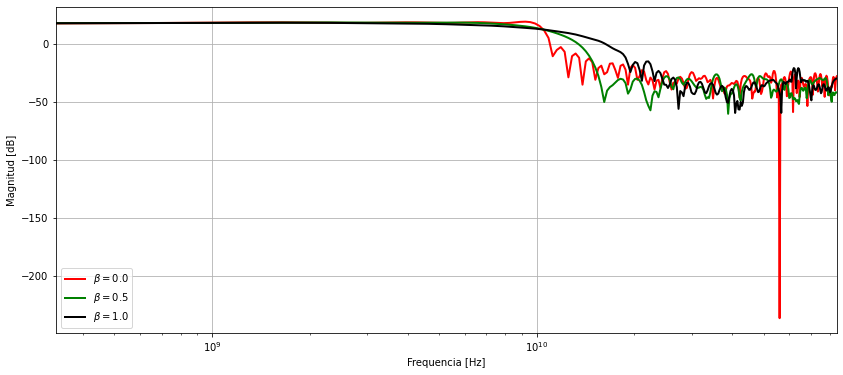

In [22]:
### Calculo respuesta en frec para los tres pulsos
[H0,A0,F0] = resp_freq(rc0, Ts, Nfreqs)
[H1,A1,F1] = resp_freq(rc1, Ts, Nfreqs)
[H2,A2,F2] = resp_freq(rc2, Ts, Nfreqs)

### Generacion de los graficos
plt.figure(figsize=[14,6])
plt.semilogx(F0, 20*np.log10(H0),'r', linewidth=2.0, label=r'$\beta=0.0$')
plt.semilogx(F1, 20*np.log10(H1),'g', linewidth=2.0, label=r'$\beta=0.5$')
plt.semilogx(F2, 20*np.log10(H2),'k', linewidth=2.0, label=r'$\beta=1.0$')

# plt.axvline(x=(1./Ts)/2.,color='k',linewidth=2.0)
# plt.axvline(x=(1./T)/2.,color='k',linewidth=2.0)
# plt.axhline(y=20*np.log10(0.5),color='k',linewidth=2.0)
plt.legend(loc=3)
plt.grid(True)
plt.xlim(F2[1],F2[len(F2)-1])
plt.xlabel('Frequencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.show()

In [23]:
def PRBSI(inf, sup, Nsymb):

    PRBSI       =   [0, 1, 0, 1, 0, 1, 0, 1, 1] # --> Semilla cargada 0x1AA
    PRI_List    =   [] 
    for i in range(Nsymb):
        aux         = PRBSI
        PRBSI       = np.roll(aux, 1)               # --> roto 1 vez
        PRBSI[0]    = (aux[4] ^ aux[8])             # --> xor entre los bits 4 y 8 
        if(PRBSI[8] == 1):  PRI_List.append(inf)     # --> si es 1 lo conviero a -1
        else :              PRI_List.append(sup)     # --> si es 0 lo convierto a 1

    PRI_Out = np.array(PRI_List)                    # --> obtengo el dato de salida
    return PRI_Out    
#///////////////////////////////////////
        
def PRBSQ(inf, sup, Nsymb):

    PRBSQ       =   [0, 1, 1, 1, 1, 1, 1, 1, 1] # --> Semilla cargada 0x1FE
    PRQ_List    =   []    
    for i in range(Nsymb):
        aux        = PRBSQ   
        PRBSQ       = np.roll(aux, 1)                # --> roto 1 vez
        PRBSQ[0]    = (aux[4] ^ aux[8])              # --> xor entre los bits 4 y 8 
        if(PRBSQ[8] == 1): PRQ_List.append(inf)       # --> si es 1 lo conviero a -1
        else :             PRQ_List.append(sup)       # --> si es 0 lo convierto a 1

    PRQ_Out = np.array(PRQ_List)                     # --> obtengo el dato de salida 
    return PRQ_Out

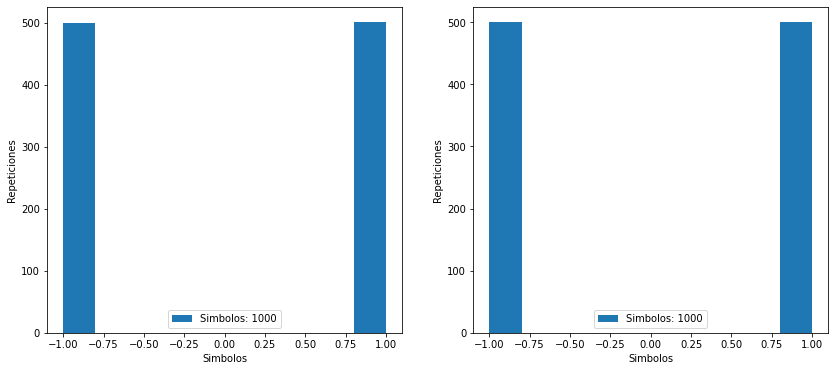

In [24]:
# symbolsI = 2*(np.random.uniform(-1,1,Nsymb)>0.0)-1
# symbolsQ = 2*(np.random.uniform(-1,1,Nsymb)>0.0)-1

symbolsI = PRBSI(-1,1,Nsymb)
symbolsQ = PRBSQ(-1,1,Nsymb)

# print (symbolsI)
label = 'Simbolos: %d' % Nsymb
plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
plt.hist(symbolsI,label=label)
plt.legend()
plt.xlabel('Simbolos')
plt.ylabel('Repeticiones')
plt.subplot(1,2,2)
plt.hist(symbolsQ,label=label)
plt.legend()
plt.xlabel('Simbolos')
plt.ylabel('Repeticiones')

plt.show()

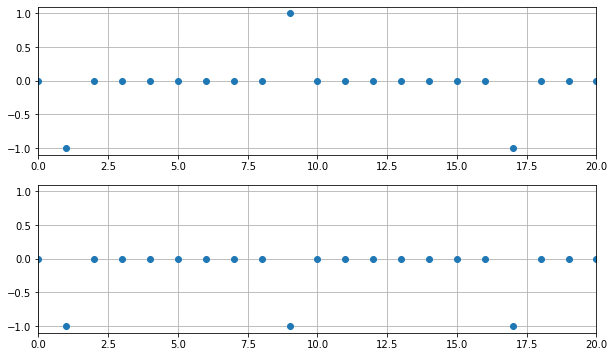

In [25]:
zsymbI = np.zeros(os*Nsymb); zsymbI[1:len(zsymbI):int(os)]=symbolsI
zsymbQ = np.zeros(os*Nsymb); zsymbQ[1:len(zsymbQ):int(os)]=symbolsQ
 
plt.figure(figsize=[10,6])
plt.subplot(2,1,1)
plt.plot(zsymbI,'o')
plt.xlim(0,20)
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(zsymbQ,'o')
plt.xlim(0,20)
plt.grid(True)

plt.show()

In [11]:
# # Calculo de tres pusos con diferente roll-off
# (t,rc01) = rcosine(0.1, T,os,Nbauds,Norm=True)
# (t,rc05) = rcosine(0.5, T,os,Nbauds,Norm=True)
# # Generacion de las graficas
# plt.figure()
# plt.plot(rc01,'o-r',linewidth=2.0,label=r'$\beta=0.1$')
# plt.hold(True)
# plt.plot(rc05,'s-g',linewidth=2.0,label=r'$\beta=0.5$')
# plt.legend()
# plt.grid(True)
# plt.xlim(0,len(rc01)-1)
# plt.xlabel('Muestras')
# plt.ylabel('Magnitud')
# plt.show()

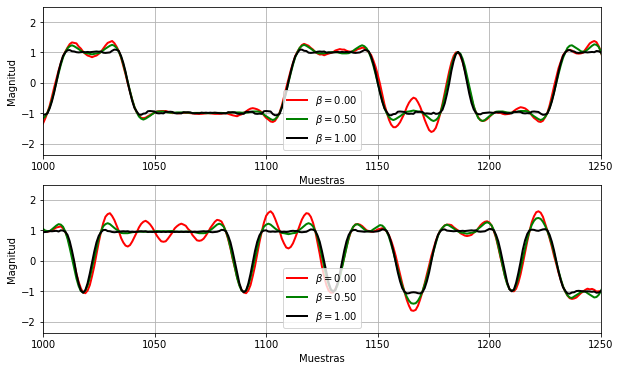

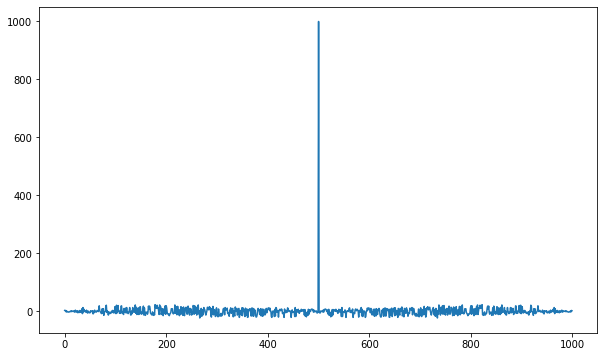

In [26]:
symb_out0I = np.convolve(rc0,zsymbI,'same'); symb_out0Q = np.convolve(rc0,zsymbQ,'same')
symb_out1I = np.convolve(rc1,zsymbI,'same'); symb_out1Q = np.convolve(rc1,zsymbQ,'same')
symb_out2I = np.convolve(rc2,zsymbI,'same'); symb_out2Q = np.convolve(rc2,zsymbQ,'same')

plt.figure(figsize=[10,6])
plt.subplot(2,1,1)
plt.plot(symb_out0I,'r-',linewidth=2.0,label=r'$\beta=%2.2f$'%beta[0])
plt.plot(symb_out1I,'g-',linewidth=2.0,label=r'$\beta=%2.2f$'%beta[1])
plt.plot(symb_out2I,'k-',linewidth=2.0,label=r'$\beta=%2.2f$'%beta[2])
plt.xlim(1000,1250)
plt.grid(True)
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Magnitud')

plt.subplot(2,1,2)
plt.plot(symb_out0Q,'r-',linewidth=2.0,label=r'$\beta=%2.2f$'%beta[0])
plt.plot(symb_out1Q,'g-',linewidth=2.0,label=r'$\beta=%2.2f$'%beta[1])
plt.plot(symb_out2Q,'k-',linewidth=2.0,label=r'$\beta=%2.2f$'%beta[2])
plt.xlim(1000,1250)
plt.grid(True)
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Magnitud')

plt.figure(figsize=[10,6])
plt.plot(np.correlate(symbolsI,2*(symb_out0I[3:len(symb_out0I):int(os)]>0.0)-1,'same'))

plt.show()

In [28]:
def eyediagram(data, n, offset, period):
    span     = 2*n
    segments = int(len(data)/span)
    xmax     = (n-1)*period
    xmin     = -(n-1)*period
    x        = list(np.arange(-n,n,)*period)
    xoff     = offset

    plt.figure()
    for i in range(0,segments-1):
        plt.plot(x, data[(i*span+xoff):((i+1)*span+xoff)],'b')       
    plt.grid(True)
    plt.xlim(xmin, xmax)
    plt.show()

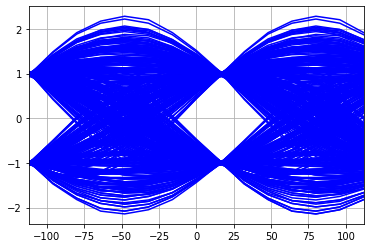

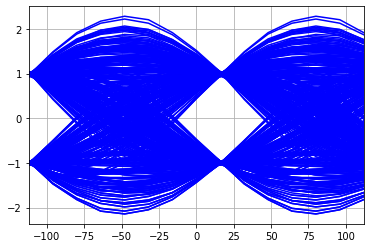

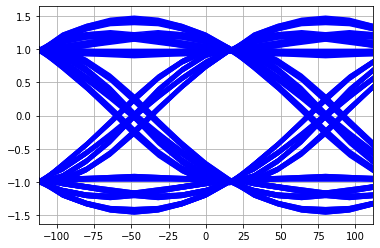

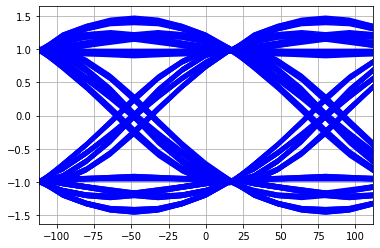

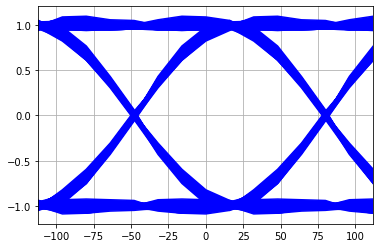

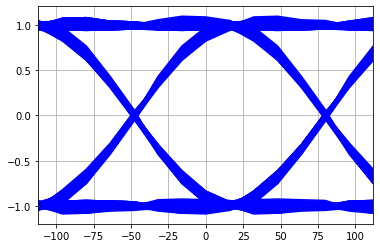

In [29]:
eyediagram(symb_out0I[100:len(symb_out0I)-100],os,5,Nbauds)
eyediagram(symb_out0Q[100:len(symb_out0Q)-100],os,5,Nbauds)

eyediagram(symb_out1I[100:len(symb_out1I)-100],os,5,Nbauds)
eyediagram(symb_out1Q[100:len(symb_out1Q)-100],os,5,Nbauds)

eyediagram(symb_out2I[100:len(symb_out2I)-100],os,5,Nbauds)
eyediagram(symb_out2Q[100:len(symb_out2Q)-100],os,5,Nbauds)

plt.show()

#plt.show(block=False)
#raw_input("Press Enter")
#plt.close()

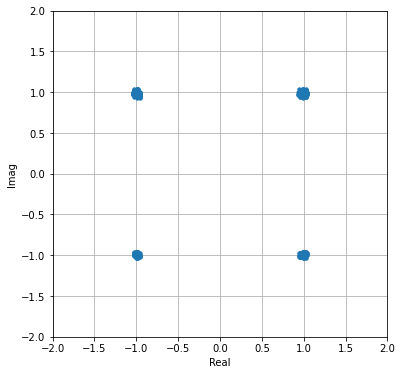

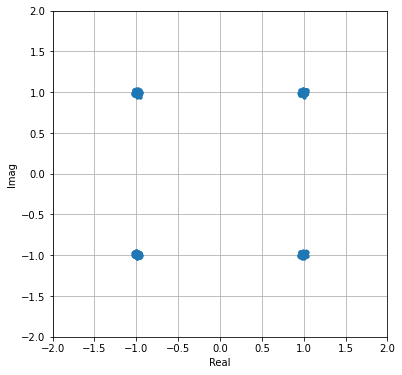

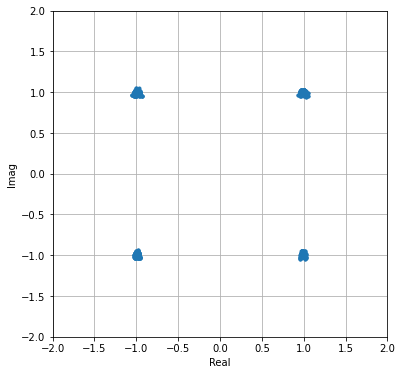

In [30]:
offset = 6

plt.figure(figsize=[6,6])
plt.plot(symb_out0I[100+offset:len(symb_out0I)-(100-offset):int(os)],
         symb_out0Q[100+offset:len(symb_out0Q)-(100-offset):int(os)],
             '.',linewidth=2.0)
plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.grid(True)
plt.xlabel('Real')
plt.ylabel('Imag')

plt.figure(figsize=[6,6])
plt.plot(symb_out1I[100+offset:len(symb_out1I)-(100-offset):int(os)],
         symb_out1Q[100+offset:len(symb_out1Q)-(100-offset):int(os)],
             '.',linewidth=2.0)
plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.grid(True)
plt.xlabel('Real')
plt.ylabel('Imag')

plt.figure(figsize=[6,6])
plt.plot(symb_out2I[100+offset:len(symb_out2I)-(100-offset):int(os)],
         symb_out2Q[100+offset:len(symb_out2Q)-(100-offset):int(os)],
             '.',linewidth=2.0)
plt.xlim((-2, 2))
plt.ylim((-2, 2))
plt.grid(True)
plt.xlabel('Real')
plt.ylabel('Imag')

plt.show()

In [16]:
NBF = 7
coeff0=DeFixedInt(intWidth=8,fractWidth=7,signedMode = "S",saturateMode="saturate",roundMode="trunc")
coeff0.value = -0.015468180292133838
print("Valor Flotante: ", coeff0.fValue)
print("Valor Entero", coeff0.intvalue)
print("Integer:",int(-0.015468180292133838 * 2**NBF))
print('Complemento a 2: ',2*2**-NBF)

Valor Flotante:  -0.015625
Valor Entero 254
Integer: -1
Complemento a 2:  0.015625
